# Week 11

# Dimensionality Reduction

Many Machine Learning problems involve thousands or even millions of features for each training instance. Not only does this make training extremely slow, it can also make it much harder to find a good solution. This problem is often referred to as the **curse of dimensionality** although this term has multiple meanings.

Fortunately, it is often possible to reduce the number of features considerably, turning an intractable problem into a tractable one. This procedure is called **dimensionality reduction**.

### Main approaches for dimensionality reduction
- Projection: remove features which have little variation.
- Manifold learning: Use a few parameters to describe the dataset.
- Principal Component Analysis (PCA): use matrix decomposition techniques to find the most important feature combinations.

In [ ]:
# Load the training set and show its first 5 rows.
import numpy as np
import pandas as pd
url = "https://pjreddie.com/media/files/mnist_train.csv"
raw_data = pd.read_csv(url, delimiter = ',', header=None)
X = raw_data.iloc[:, 1:].to_numpy()/255.
y = raw_data.iloc[:, 0].to_numpy()

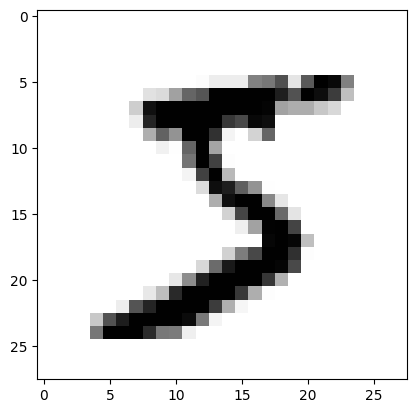

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0, :].reshape(28, 28),
           cmap=plt.cm.binary)
plt.show()

In [ ]:
# use PCA to reduce the number of features
from sklearn.decomposition import PCA

pca = PCA(n_components=75)
X_reduced = pca.fit_transform(X)

print('X shape:', X.shape)
print('X_reduced shape:', X_reduced.shape)

X shape: (60000, 784)
X_reduced shape: (60000, 75)


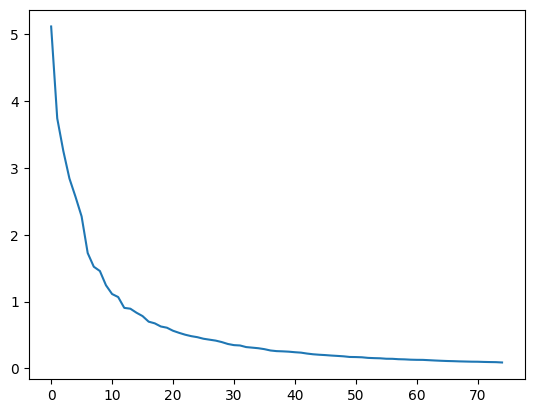

In [ ]:
plt.plot(pca.explained_variance_)

In [ ]:
import numpy as np
print(np.sum(np.var(X,axis=0)))
print(np.sum(pca.explained_variance_[:50]))
pca.explained_variance_[:50]

52.72503549512684
43.48025945970597


array([5.11687301, 3.74139084, 3.25270845, 2.8416207 , 2.56711774,
       2.27366339, 1.72515498, 1.52056024, 1.45630525, 1.24275009,
       1.11208951, 1.06664054, 0.90468083, 0.89218122, 0.83235305,
       0.78190032, 0.69838687, 0.67325581, 0.62599524, 0.60776302,
       0.56214588, 0.53079883, 0.50278025, 0.48114703, 0.4657832 ,
       0.44253869, 0.42843961, 0.41461871, 0.39266734, 0.36426179,
       0.34698596, 0.34174189, 0.31773428, 0.30928082, 0.30054903,
       0.28663271, 0.26668051, 0.25722791, 0.25383802, 0.24900674,
       0.24082399, 0.23454385, 0.22065865, 0.20996268, 0.20298137,
       0.19777666, 0.19087246, 0.18537962, 0.17929871, 0.16971115])

In [ ]:
# The first image in original 784 features
X[0, :]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# The first image in the derived features
X_reduced[0, :]

array([ 0.48601015, -1.22617358, -0.09613354, -2.17944297, -0.10704576,
       -0.9116717 ,  0.91763033,  0.62666468, -1.4255491 ,  0.77814932,
        0.77449814, -0.9962977 , -0.44508396,  2.938441  ,  0.85984139,
       -0.01840485,  1.29471369,  1.2123682 ,  1.0886034 ,  0.65228379,
        0.10800698, -0.25236609, -0.85167959,  0.98135102,  0.18104241,
        0.39348657, -1.20786816,  0.66707912, -0.49221135, -0.48392329,
       -0.38415495,  0.1355887 ,  0.42151387,  0.33176113, -0.5976801 ,
        0.7874464 ,  0.2558462 ,  0.78515562,  0.61829056, -1.41073293,
        0.72776873,  0.60570601, -0.15775255, -0.33320424, -0.48559229,
        0.02757711,  0.50004925, -0.29980369,  0.13426215,  0.07852035,
        0.51064773, -0.42932406, -0.46355074,  0.34191793,  0.01105105,
       -0.63980066, -0.46195526, -0.23907398, -0.58355397,  0.48755098,
        0.26395386, -0.02355383, -0.31994464,  0.33813941,  0.7005018 ,
        0.49285732,  0.77476165,  0.08411691,  0.21911004,  0.07

In [ ]:
# Recover the data from compressed representation
X0 = pca.inverse_transform(X_reduced[0])

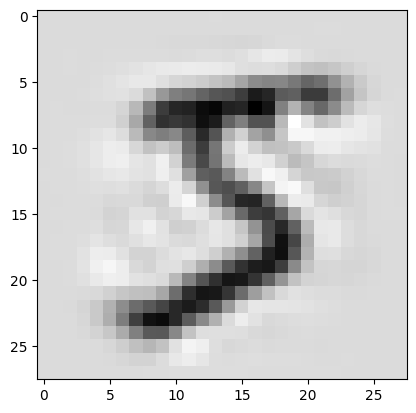

In [ ]:
# Display the recovered image
plt.imshow(X0.reshape(28, 28),
           cmap=plt.cm.binary)
plt.show()

In [ ]:
# Recover the data from compressed representation
X_recover = pca.inverse_transform(X_reduced)

In [ ]:
print(np.sum(np.var(X,axis=0)))
print(np.sum(pca.explained_variance_[:75])+np.sum(np.var(X_recover-X,axis=0)))
print(np.sum(np.var(X_recover-X,axis=0)))

52.72503549512684
52.72581127354442
6.179106221336671


## Singular Value Decomposition

Suppose $m\ge n$. For an arbitrary $m\times n$ real-valued matrix $A$, there exists a \textbf{singluar value decomposition (SVD)} of the form
$$A = U\cdot \Sigma \cdot V^{T}$$
where
- $U$ is an $m\times m$ orthogonal matrix, i.e., $UU^T = U^TU = I_m$.
- $V$ is an $n\times n$ orthogonal matrix, i.e., $VV^T = V^TV = I_n$.
- $\Sigma=diag(\sigma_1, \sigma_2,...,\sigma_n$ is an $m\times n$ "diagonal" matrix with $\sigma_1\ge\sigma_2\ge\cdots\ge\sigma_n\ge 0$.

**Remarks**
- The $i$-th vectors $u^i$ of $U$ is called **the $i$-th left singular vector**.
- The $i$-th vectors $v^i$ of $V$ is called **the $i$-th right singular vector**.
- Singular vectors satisfy $Av^i = \sigma_iu^i$ and $A^Tu^i = \sigma_iv^i$.
    
**Properties of SVD**
- $\sigma_i(A) = \sqrt{\sigma_i(A^TA)} = \sqrt{\sigma_i(AA^T)}$ ...(and the $\sigma_i$ are the square roots of the eigenvalues for $A^TA$ or $AA^T$)
- $u^i$ is the $i$-th eigenvector of $AA^T$.
- $v^i$ is the $i$-th eigenvector of $A^TA$.
- $rank(A)=r$ equals to the number of non-zero singular values of $A$. Moreover, let $U_r$ denote the matrix consisting of the first $r$ columns of $U$, $V_r$ denote the matrix consisting the first $r$ columns of $V$, and $\Sigma_r$ denote the principal $r\times r $ sub-matrix of $\Sigma$, then $A$ can be written as a summation of $r$ rank one matrices
$$A = U_r\Sigma_rV_r = \sum_{i=1}^r\sigma_iu^i(v^i)^T.$$
- The column span of A, $span(A)$, equals to $span(u^1,...,u^r)$.
- The null space of $span(A)$ equals to $span(v^{r+1},...,v^n)$.

### Low-Rank Approximation $A_k$

For $k\le r$ we define
$$A_k = U_k\Sigma_kV_k^T = \sum_{i=1}^k\sigma_iu^i(v^i)^T.$$
- $A_k = U_kU_k^TA = AV_kV_k^T$, and $A_k$ is the projection of $A$ onto $span(u^1,...,u^k)$.
- $\|A-A_k\|_2=\sigma_{k+1}(A)$, and $A_k$ is the closest rank-$k$ approximation to $A$ in spectral norm.
- $\|A-A_k\|_F=\sum_{i=k+1}^r\sigma_i(A)$, and $A_k$ is the closest rank-$k$ approximation to $A$ in Frobenius norm.

### Deterministic Algorithms for $A_k$
- In the RAM model (infinite precision arithmetic), full-SVD can be computed in $\Theta(mn^2)$ time, and $A_k$ can be computed in $\Theta(mnk)$ time.
- Since any deterministic algorithm must read all matrix entries, so the running time must be $\Omega(mn)$ for dense matrices, and $\Omega(nnz(A))$ for sparse matrices, where $nnz(A)$ is the number of non-zero entries in $A$.
- Under assumption of finite precision, one typically an iterative algorithm for SVD, with backward error related to the condition number $\kappa(A) = \sigma_1(A) / \sigma_r(A)$.
- Communication is also expensive, since deterministic SVD algorithms are difficult to parallelize.

## PCA Example: Analyzing Human Genome
- Over 99\% of human DNA are identical accross the entire human race.
- **Single Nucleotide Polymorphisms (SNPs)** are known locations at the human genome where two alternate nucleotide bases are observed (out of A, C, G, T).
- SNPs are the most commen type of genetic variation in the genome across different individuals.
- 447,143 SNPs (columns) are recorded on 2,240 individuals (rows), forming a dense matrix with over one billion entries.

<img src="https://www.genome.gov/sites/default/files/tg/en/illustration/single_nucleotide_polymorphism_snps.jpg" width="600">


<img src="https://image1.slideserve.com/2471409/slide14-l.jpg" width="800">

<img src="https://www.mapsofworld.com/images-mow/world-map.jpg" width="800">

<img src="https://image.slidesharecdn.com/drineascmu2012-121023170605-phpapp02/95/randomized-algorithms-in-linear-algebra-the-column-subset-selection-problem-15-638.jpg?cb=1351012061" width="800">